# setup


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('data.csv')

In [0]:
df.head()

,date,plant_name,plant_size,plant_country
0,01-01-90,Caryophyllaceae,655.059,Haiti
1,02-01-90,Caryophyllaceae,267.211,Portugal
2,03-01-90,Caryophyllaceae,869.245,China
3,04-01-90,Caryophyllaceae,398.690,United States
4,05-01-90,Caryophyllaceae,232.735,Poland


In [0]:
df['date'] = pd.to_datetime(df.date,format='%d-%m-%y')

In [0]:
df.head()

,date,plant_name,plant_size,plant_country
0,1990-01-01,Caryophyllaceae,655.059,Haiti
1,1990-01-02,Caryophyllaceae,267.211,Portugal
2,1990-01-03,Caryophyllaceae,869.245,China
3,1990-01-04,Caryophyllaceae,398.690,United States
4,1990-01-05,Caryophyllaceae,232.735,Poland


In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


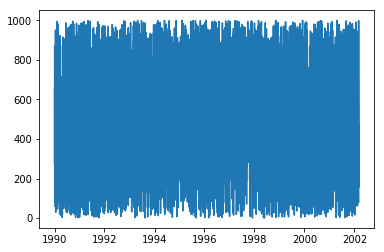

In [0]:
plt.plot(df.date,df.plant_size)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b0aef0f98>]], dtype=object)

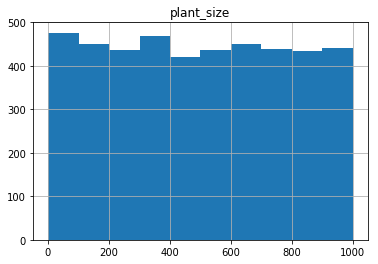

In [0]:
df.hist()

In [0]:
mean=df.plant_size.mean()

In [0]:
std=df.plant_size.std()

In [0]:
df.plant_size=df.plant_size.apply(lambda x: (x-mean)/std)


In [0]:
df.head()

,date,plant_name,plant_size,plant_country
0,1990-01-01,Caryophyllaceae,0.550875,Haiti
1,1990-01-02,Caryophyllaceae,-0.787310,Portugal
2,1990-01-03,Caryophyllaceae,1.289878,China
3,1990-01-04,Caryophyllaceae,-0.333670,United States
4,1990-01-05,Caryophyllaceae,-0.906262,Poland


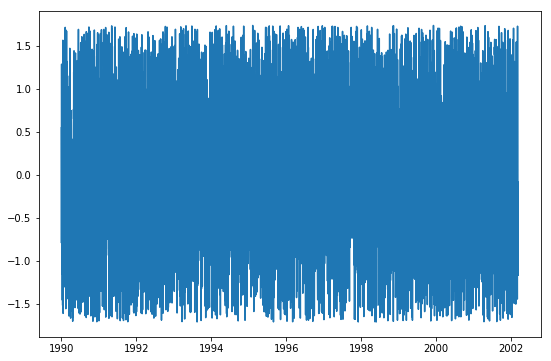

In [0]:
fig = plt.figure(figsize =(9,6))
plt.plot(df.date,df.plant_size)
plt.show()

In [0]:
df.index = df['date']

data = df.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0, len(df)), columns=['date', 'plant_size'])

for i in range(0, len(data)):
  new_data['date'][i] = data['date'][i]
  new_data['plant_size'][i] = data['plant_size'][i]
  

In [0]:
new_data.head()

,date,plant_size
0,1990-01-01 00:00:00,0.550875
1,1990-01-02 00:00:00,-0.78731
2,1990-01-03 00:00:00,1.28988
3,1990-01-04 00:00:00,-0.33367
4,1990-01-05 00:00:00,-0.906262


In [0]:
!pip install fastai==0.7.0

In [0]:
from fastai.structured import add_datepart

In [0]:
add_datepart(new_data, 'date')

In [0]:
new_data.head()

,plant_size,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0.550875,1990,1,1,1,0,1,False,True,False,True,False,True,631152000
1,-0.78731,1990,1,1,2,1,2,False,False,False,False,False,False,631238400
2,1.28988,1990,1,1,3,2,3,False,False,False,False,False,False,631324800
3,-0.33367,1990,1,1,4,3,4,False,False,False,False,False,False,631411200
4,-0.906262,1990,1,1,5,4,5,False,False,False,False,False,False,631497600


In [0]:
new_data.drop(['Elapsed'], axis=1, inplace=True)
new_data.columns

Index(['plant_size', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start'],
      dtype='object')

In [0]:
# for i in new_data.columns:
#   new_data[i] = new_data[i].astype('float64')

new_data.astype('float64')
new_data.columns

Index(['plant_size', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start'],
      dtype='object')

In [0]:
import numpy as np

In [0]:
for i in new_data.columns:
  if type(new_data[i][0]) is np.bool_ or type(new_data[i][0]) is np.int64:
    new_data[i] = new_data[i].astype(np.float64)
    
l = [type(new_data[i][0]) for i in new_data.columns ]
l

[numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64]

In [0]:
new_data.columns

Index(['plant_size', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start'],
      dtype='object')

In [0]:
type(new_data['plant_size'][0])

numpy.float64

In [0]:
type(new_data['Year'][0])

numpy.int64

In [0]:
new_data['Year'] = new_data['Year'].astype('float64')

In [0]:
new_data.columns

Index(['plant_size', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start'],
      dtype='object')

In [0]:
df.head()

,date,plant_name,plant_size,plant_country
date,,,,
1990-01-01,1990-01-01,Caryophyllaceae,0.550875,Haiti
1990-01-02,1990-01-02,Caryophyllaceae,-0.787310,Portugal
1990-01-03,1990-01-03,Caryophyllaceae,1.289878,China
1990-01-04,1990-01-04,Caryophyllaceae,-0.333670,United States
1990-01-05,1990-01-05,Caryophyllaceae,-0.906262,Poland


In [0]:
# tmp = pd.get_dummies(data=df.plant_country, columns=['plant_country'], prefix="name_", sparse=True)
# tmp.head()
# new_df = pd.concat([new_data, tmp], axis=1) 
# del tmp
# new_df.head()

,name__Afghanistan,name__Aland Islands,name__Albania,name__American Samoa,name__Angola,name__Argentina,name__Armenia,name__Aruba,name__Australia,name__Austria,name__Azerbaijan,name__Bahamas,name__Bahrain,name__Bangladesh,name__Belarus,name__Belgium,name__Belize,name__Benin,name__Bhutan,name__Bolivia,name__Bosnia and Herzegovina,name__Botswana,name__Brazil,name__Brunei,name__Bulgaria,name__Burkina Faso,name__Burundi,name__Cambodia,name__Cameroon,name__Canada,name__Cape Verde,name__Central African Republic,name__Chad,name__Chile,name__China,name__Colombia,name__Comoros,name__Costa Rica,name__Croatia,name__Cuba,...,name__Senegal,name__Serbia,name__Seychelles,name__Sierra Leone,name__Singapore,name__Slovenia,name__Somalia,name__South Africa,name__South Korea,name__Spain,name__Sri Lanka,name__Sudan,name__Suriname,name__Sweden,name__Switzerland,name__Syria,name__Taiwan,name__Tajikistan,name__Tanzania,name__Thailand,name__Togo,name__Tokelau,name__Trinidad and Tobago,name__Tunisia,name__Turkey,name__Turkmenistan,name__Tuvalu,name__Uganda,name__Ukraine,name__United Kingdom,name__United States,name__Uruguay,name__Uzbekistan,name__Vanuatu,name__Venezuela,name__Vietnam,name__Wallis and Futuna,name__Yemen,name__Zambia,name__Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1990-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# new_df = pd.DataFrame()
# for i in tmp.columns:
#   new_df[i] = tmp[i]

# new_df.head()

,name__Afghanistan,name__Aland Islands,name__Albania,name__American Samoa,name__Angola,name__Argentina,name__Armenia,name__Aruba,name__Australia,name__Austria,name__Azerbaijan,name__Bahamas,name__Bahrain,name__Bangladesh,name__Belarus,name__Belgium,name__Belize,name__Benin,name__Bhutan,name__Bolivia,name__Bosnia and Herzegovina,name__Botswana,name__Brazil,name__Brunei,name__Bulgaria,name__Burkina Faso,name__Burundi,name__Cambodia,name__Cameroon,name__Canada,name__Cape Verde,name__Central African Republic,name__Chad,name__Chile,name__China,name__Colombia,name__Comoros,name__Costa Rica,name__Croatia,name__Cuba,...,name__Senegal,name__Serbia,name__Seychelles,name__Sierra Leone,name__Singapore,name__Slovenia,name__Somalia,name__South Africa,name__South Korea,name__Spain,name__Sri Lanka,name__Sudan,name__Suriname,name__Sweden,name__Switzerland,name__Syria,name__Taiwan,name__Tajikistan,name__Tanzania,name__Thailand,name__Togo,name__Tokelau,name__Trinidad and Tobago,name__Tunisia,name__Turkey,name__Turkmenistan,name__Tuvalu,name__Uganda,name__Ukraine,name__United Kingdom,name__United States,name__Uruguay,name__Uzbekistan,name__Vanuatu,name__Venezuela,name__Vietnam,name__Wallis and Futuna,name__Yemen,name__Zambia,name__Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1990-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# new_data.columns

Index(['plant_size', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start'],
      dtype='object')

In [0]:
# tmp.columns

Index(['name__Afghanistan', 'name__Aland Islands', 'name__Albania',
       'name__American Samoa', 'name__Angola', 'name__Argentina',
       'name__Armenia', 'name__Aruba', 'name__Australia', 'name__Austria',
       ...
       'name__United States', 'name__Uruguay', 'name__Uzbekistan',
       'name__Vanuatu', 'name__Venezuela', 'name__Vietnam',
       'name__Wallis and Futuna', 'name__Yemen', 'name__Zambia',
       'name__Zimbabwe'],
      dtype='object', length=191)

In [0]:
# for i in new_data.columns:
#   new_df[i] = new_data[i]

# new_df.head()

,name__Afghanistan,name__Aland Islands,name__Albania,name__American Samoa,name__Angola,name__Argentina,name__Armenia,name__Aruba,name__Australia,name__Austria,name__Azerbaijan,name__Bahamas,name__Bahrain,name__Bangladesh,name__Belarus,name__Belgium,name__Belize,name__Benin,name__Bhutan,name__Bolivia,name__Bosnia and Herzegovina,name__Botswana,name__Brazil,name__Brunei,name__Bulgaria,name__Burkina Faso,name__Burundi,name__Cambodia,name__Cameroon,name__Canada,name__Cape Verde,name__Central African Republic,name__Chad,name__Chile,name__China,name__Colombia,name__Comoros,name__Costa Rica,name__Croatia,name__Cuba,...,name__Sweden,name__Switzerland,name__Syria,name__Taiwan,name__Tajikistan,name__Tanzania,name__Thailand,name__Togo,name__Tokelau,name__Trinidad and Tobago,name__Tunisia,name__Turkey,name__Turkmenistan,name__Tuvalu,name__Uganda,name__Ukraine,name__United Kingdom,name__United States,name__Uruguay,name__Uzbekistan,name__Vanuatu,name__Venezuela,name__Vietnam,name__Wallis and Futuna,name__Yemen,name__Zambia,name__Zimbabwe,plant_size,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# len(new_df), len(new_df.notnull())

(8898, 8898)

In [0]:
new_data.head()

,plant_size,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,0.550875,1990.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,-0.78731,1990.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.28988,1990.0,1.0,1.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.33367,1990.0,1.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.906262,1990.0,1.0,1.0,5.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
Y = new_data.plant_size.as_matrix()
X = new_data.drop(['plant_size'], axis=1).as_matrix()

X.shape, Y.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


((4449, 12), (4449,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3559, 12), (3559,), (890, 12), (890,))

# Model

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
linear_model = LinearRegression()

In [0]:
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluation

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = linear_model.predict(x_test)

In [0]:
type(y_pred)

numpy.ndarray

In [0]:
type(y_test)

numpy.ndarray

In [0]:
def loss_rmse(y_true, y_pred):
  """Function to calculate Root Mean Square Error."""
  return np.sqrt(np.mean(np.power((y_true - y_pred), 2)))

In [0]:
loss_rmse(y_test, y_pred)

0.978081358490014

In [0]:
y_pred[0], y_test[0], x_test[0]

(0.008515392235580954,
 0.4869761789470196,
 array([1992.,    3.,   11.,   13.,    4.,   73.,    0.,    0.,    0.,    0.,    0.,    0.]))

0